In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

data = pd.read_csv(r'C:\Users\sopli\Área de Trabalho\Programming\Personal\Python\Automobile-Insurance-Claim-Prediction2\insurance_claims.csv')

data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [3]:
data.shape

(1000, 39)

In [4]:
data.size

39000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
data.isna().sum()                                  #Checks How many missing values there are

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

fraud_reported
N    753
Y    247
Name: count, dtype: int64


<Axes: xlabel='fraud_reported', ylabel='count'>

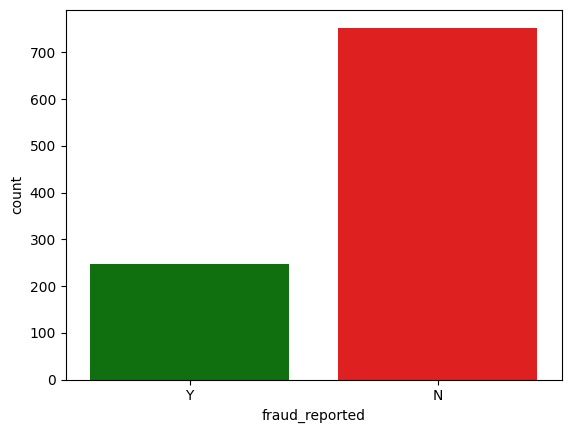

In [7]:
print(data['fraud_reported'].value_counts())
sb.countplot(x='fraud_reported', data=data, palette={'Y': 'green', 'N': 'red'})

<Axes: xlabel='incident_state'>

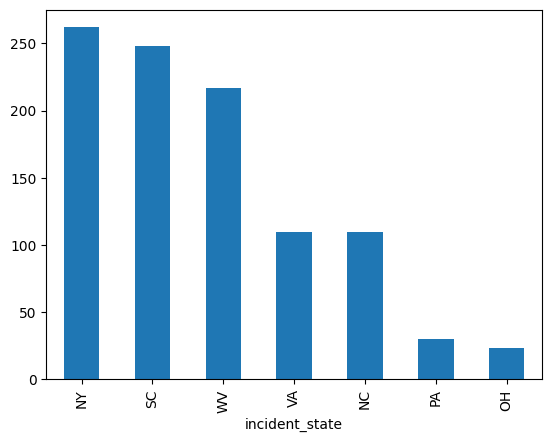

In [8]:
data['incident_state'].value_counts().plot(kind= 'bar')

<Axes: xlabel='incident_state', ylabel='count'>

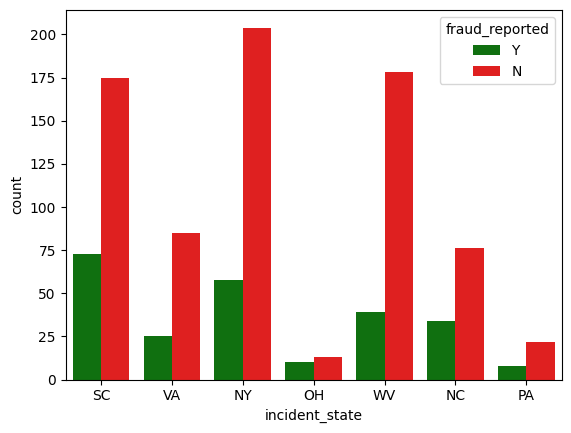

In [9]:
sb.countplot(x='incident_state', data=data, hue='fraud_reported', palette={'Y': 'green', 'N': 'red'})

<Axes: xlabel='policy_state', ylabel='count'>

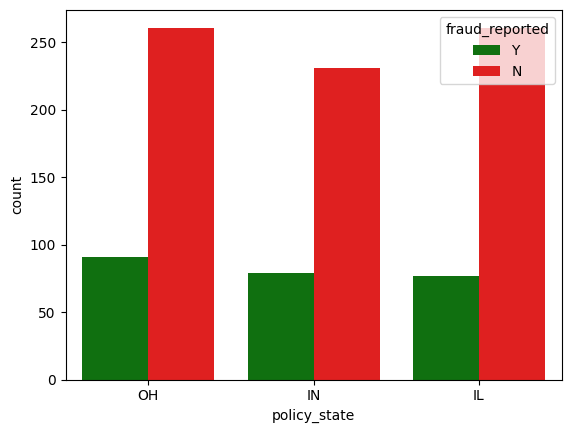

In [10]:
sb.countplot(x='policy_state', data=data, hue='fraud_reported', palette={'Y': 'green', 'N': 'red'})

<Axes: xlabel='incident_type', ylabel='count'>

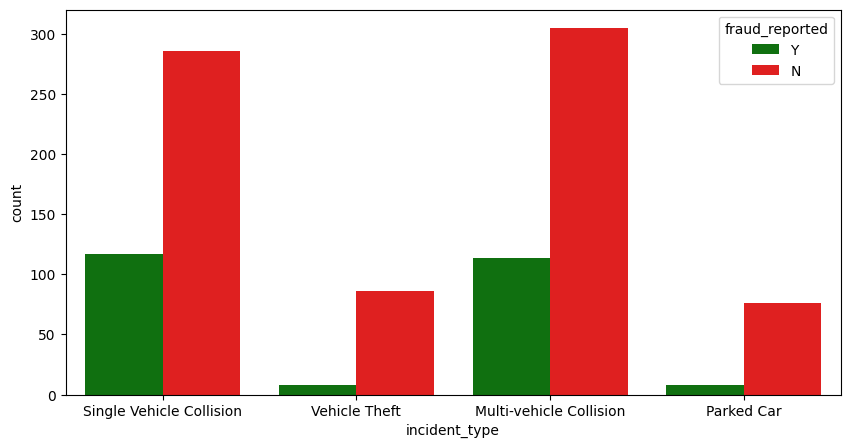

In [11]:
plt.figure(figsize=(10,5))
sb.countplot(x='incident_type', data=data, hue='fraud_reported', palette={'Y': 'green', 'N': 'red'})

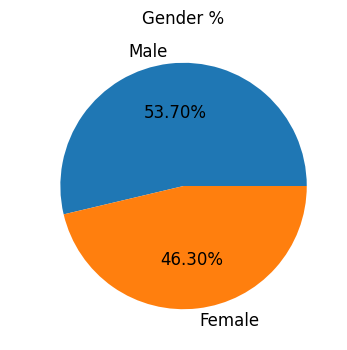

In [12]:
fig = plt.figure(figsize=(6,4))
ax = (data['insured_sex'].value_counts()* 100.0 /len(data))\
.plot.pie(autopct='%.2f%%', labels = ['Male', 'Female'], fontsize=12) 
ax.set_title('Gender %')
ax.set(ylabel=' ')
plt.show()                                                                                  

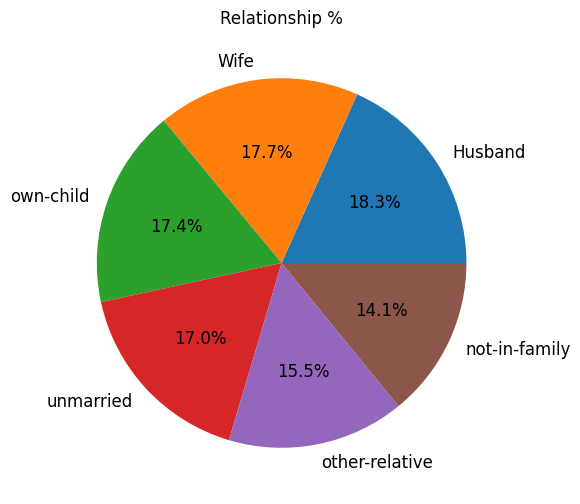

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = (data['insured_relationship'].value_counts()* 100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['Husband', 'Wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'], 
          fontsize=12) 
ax.set_title('Relationship %')
#Hide y-axis label
ax.set(ylabel=' ')
plt.show()

<Axes: xlabel='police_report_available'>

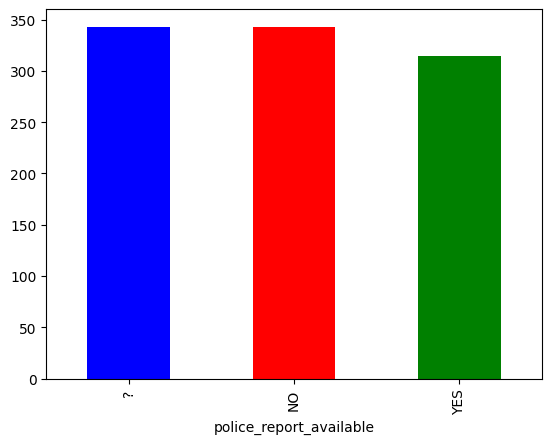

In [14]:
color_map = {'?': 'blue', 'YES': 'green', 'NO': 'red'}
data['police_report_available'].value_counts().plot(kind='bar', color=[color_map[val] for val in data['police_report_available'].value_counts().index])

<Axes: xlabel='property_damage'>

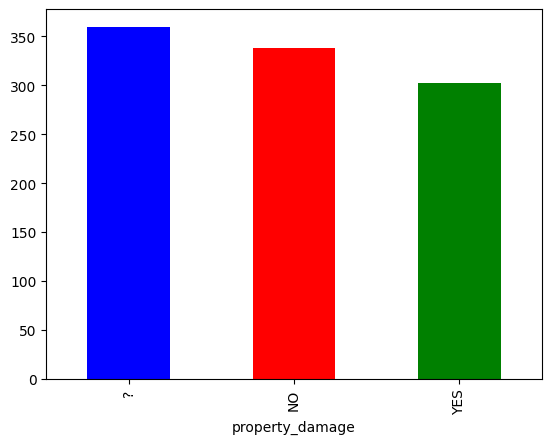

In [15]:
color_map = {'?': 'blue', 'YES': 'green', 'NO': 'red'}
data['property_damage'].value_counts().plot(kind='bar', color=[color_map[val] for val in data['property_damage'].value_counts().index])

<Axes: xlabel='collision_type'>

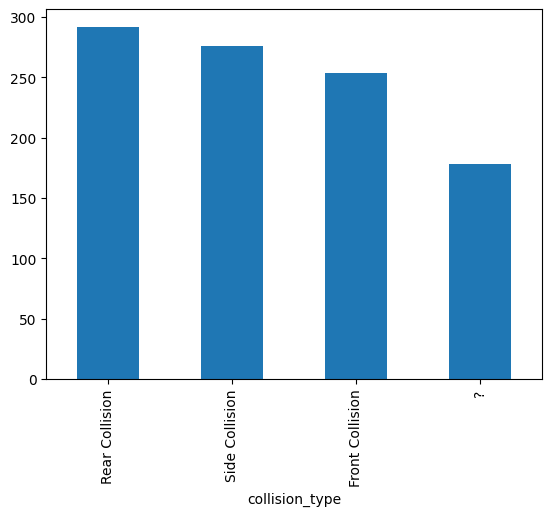

In [16]:
data.collision_type.value_counts().plot(kind= 'bar')

In [17]:
data.replace('?', np.nan, inplace= True)                        #replacing ? as NULL values

In [18]:
data.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [19]:
data['police_report_available'] = data['police_report_available'].fillna(data['police_report_available'].mode()[0])
data['property_damage'] = data['property_damage'].fillna(data['property_damage'].mode()[0])
data['collision_type'] = data['collision_type'].fillna(data['collision_type'].mode()[0])
data['authorities_contacted'] = data['authorities_contacted'].fillna(data['authorities_contacted'].mode()[0])

#mode fills any missing values in the column with the most frequent value in that column

In [22]:
data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
data['insured_sex'] = le.fit_transform(data['insured_sex'])
data['insured_relationship'] = le.fit_transform(data['insured_relationship'])
data['incident_type'] = le.fit_transform(data['incident_type'])
data['policy_state'] = le.fit_transform(data['policy_state'])
data['insured_education_level'] = le.fit_transform(data['insured_education_level'])
data['insured_occupation'] = le.fit_transform(data['insured_occupation'])
data['insured_hobbies'] = le.fit_transform(data['insured_hobbies'])
data['insured_relationship'] = le.fit_transform(data['insured_relationship'])
data['collision_type'] = le.fit_transform(data['collision_type'])
data['incident_severity'] = le.fit_transform(data['incident_severity'])
data['authorities_contacted'] = le.fit_transform(data['authorities_contacted'])

data['incident_state'] = le.fit_transform(data['incident_state'])
data['incident_city'] = le.fit_transform(data['incident_city'])
data['incident_location'] = le.fit_transform(data['incident_location'])
data['property_damage'] = le.fit_transform(data['property_damage'])
data['police_report_available'] = le.fit_transform(data['police_report_available'])
data['auto_make'] = le.fit_transform(data['auto_make'])
data['auto_model'] = le.fit_transform(data['auto_model'])
data['fraud_reported'] = le.fit_transform(data['fraud_reported'])

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 15))
sb.heatmap(data = data.corr(), annot = True, fmt = '.2g', linewidth = 1)
plt.show()

ValueError: could not convert string to float: '2014-10-17'

<Figure size 2000x1500 with 0 Axes>